In [4]:
import numpy as np

def save_embeddings(emb, dic, filename):
    f = open(filename, 'w')
    for i in range(len(emb)):
        f.write(dic[i])
        for j in emb[i]:
            f.write(" "+str(j))
        f.write("\n")
            
def load_embeddings(filename):
    emb = {}
    dic = dict()
    reverse_dic = dict()
    
    f = open(filename, "r")
    eof = False
    id = 0
    while not eof:
        
        line = f.readline()
        if line != "":
            sline = line.split()
            vec = np.float64(sline[1:])
            word = sline[0]
            #print(word)
            #print(vec)
            emb[id] = vec
            dic[id] = word
            reverse_dic[word] = id
            id += 1
        else :
            eof = True
    return emb, dic, reverse_dic

In [5]:
def dist(a,b):   
    # la distance euclidienne entre a et b
    resultat = np.array([])
    
    for i in range(len(b)):
        resultat = np.append(resultat,[(np.sqrt(np.sum(np.power(a-b[i], 2))))])
        
    return resultat


In [6]:
#emb2.txt est le meilleur embedding de 50 dimension (plus faible perte)
emb, dic, reverse_dic = load_embeddings("emb2.txt")

In [7]:
def nClosestWords(word, n): #the dics and embeddings need to be charged already

    import random as r
    import collections

    try:
        id_word = reverse_dic[word]
    except:
        print("The chosen word doesn't exist in Lord Of The Ring. Please try something else.")
        return
    vec = emb[id_word]

    distances  = dist(vec,emb)
    print( word + " ---> ")

    mins = distances.argsort()[:n]
    #mins = np.delete(mins, 0) #we delete the minmum distance, wich is the same word
    for i in mins:
        print(dic[i])


In [8]:
def closestWord(vec):
    #changement pour afficher les 10 plus proches de aIsToB
    distances  = dist(vec,emb)
    return distances.argsort()[:10]
    

In [9]:
def aIsToB(boy, son, girl): #dictionnary and embeddings must be loaded
    #This function tries to guess the corresponding hword given a couple of words, and another one for comparison
    # EX: "boy" is to "son" what "girl" is to ? => the model should guess "daughter"
    
    
    id_boy = reverse_dic[boy]
    id_son = reverse_dic[son]
    id_girl = reverse_dic[girl]
    
    emb_boy = emb[id_boy]
    emb_son = emb[id_son]
    emb_girl = emb[id_girl]
    
    diff = emb_son - emb_boy
    
    guess = emb_girl + diff
        
    #print(guess)
    #print(emb_son)
    guessed_word = closestWord(guess)
    
    print(boy + " is to "+ son)
    print("what " + girl + " is to ?")
    print( "==> " )
    for i in guessed_word:
        print(dic[i])
    

    
    
    

In [12]:
def aPlusB(a, b):
    id_a = reverse_dic[a]
    id_b = reverse_dic[b]
    
    emb_a = emb[id_a]
    emb_b = emb[id_b]
    
    new_emb = emb_a + emb_b
    
    guessed_word = closestWord(new_emb)
    
    print(a +" + "+b+" ==> ")
    
    for i in guessed_word:
        print(dic[i])

    

In [11]:
aIsToB("is","was", "go")


is is to was
what go is to ?
==> 
go
get
sit
rest
stand
attributed
ride
beg
valinorean
disappear


In [16]:
aPlusB("aragorn", "father")

print("")

guessed_word = closestWord(emb[reverse_dic["galadriel"]])
for i in guessed_word:
        print(dic[i])

aragorn + father ==> 
father
aragorn
arathorn
anarion
gandalf
grasp
linden
eomer
elrond
hir

galadriel
eowyn
lady
faramir
sparingly
lorien
perilous
shirriff-houses
stirrups
hinted


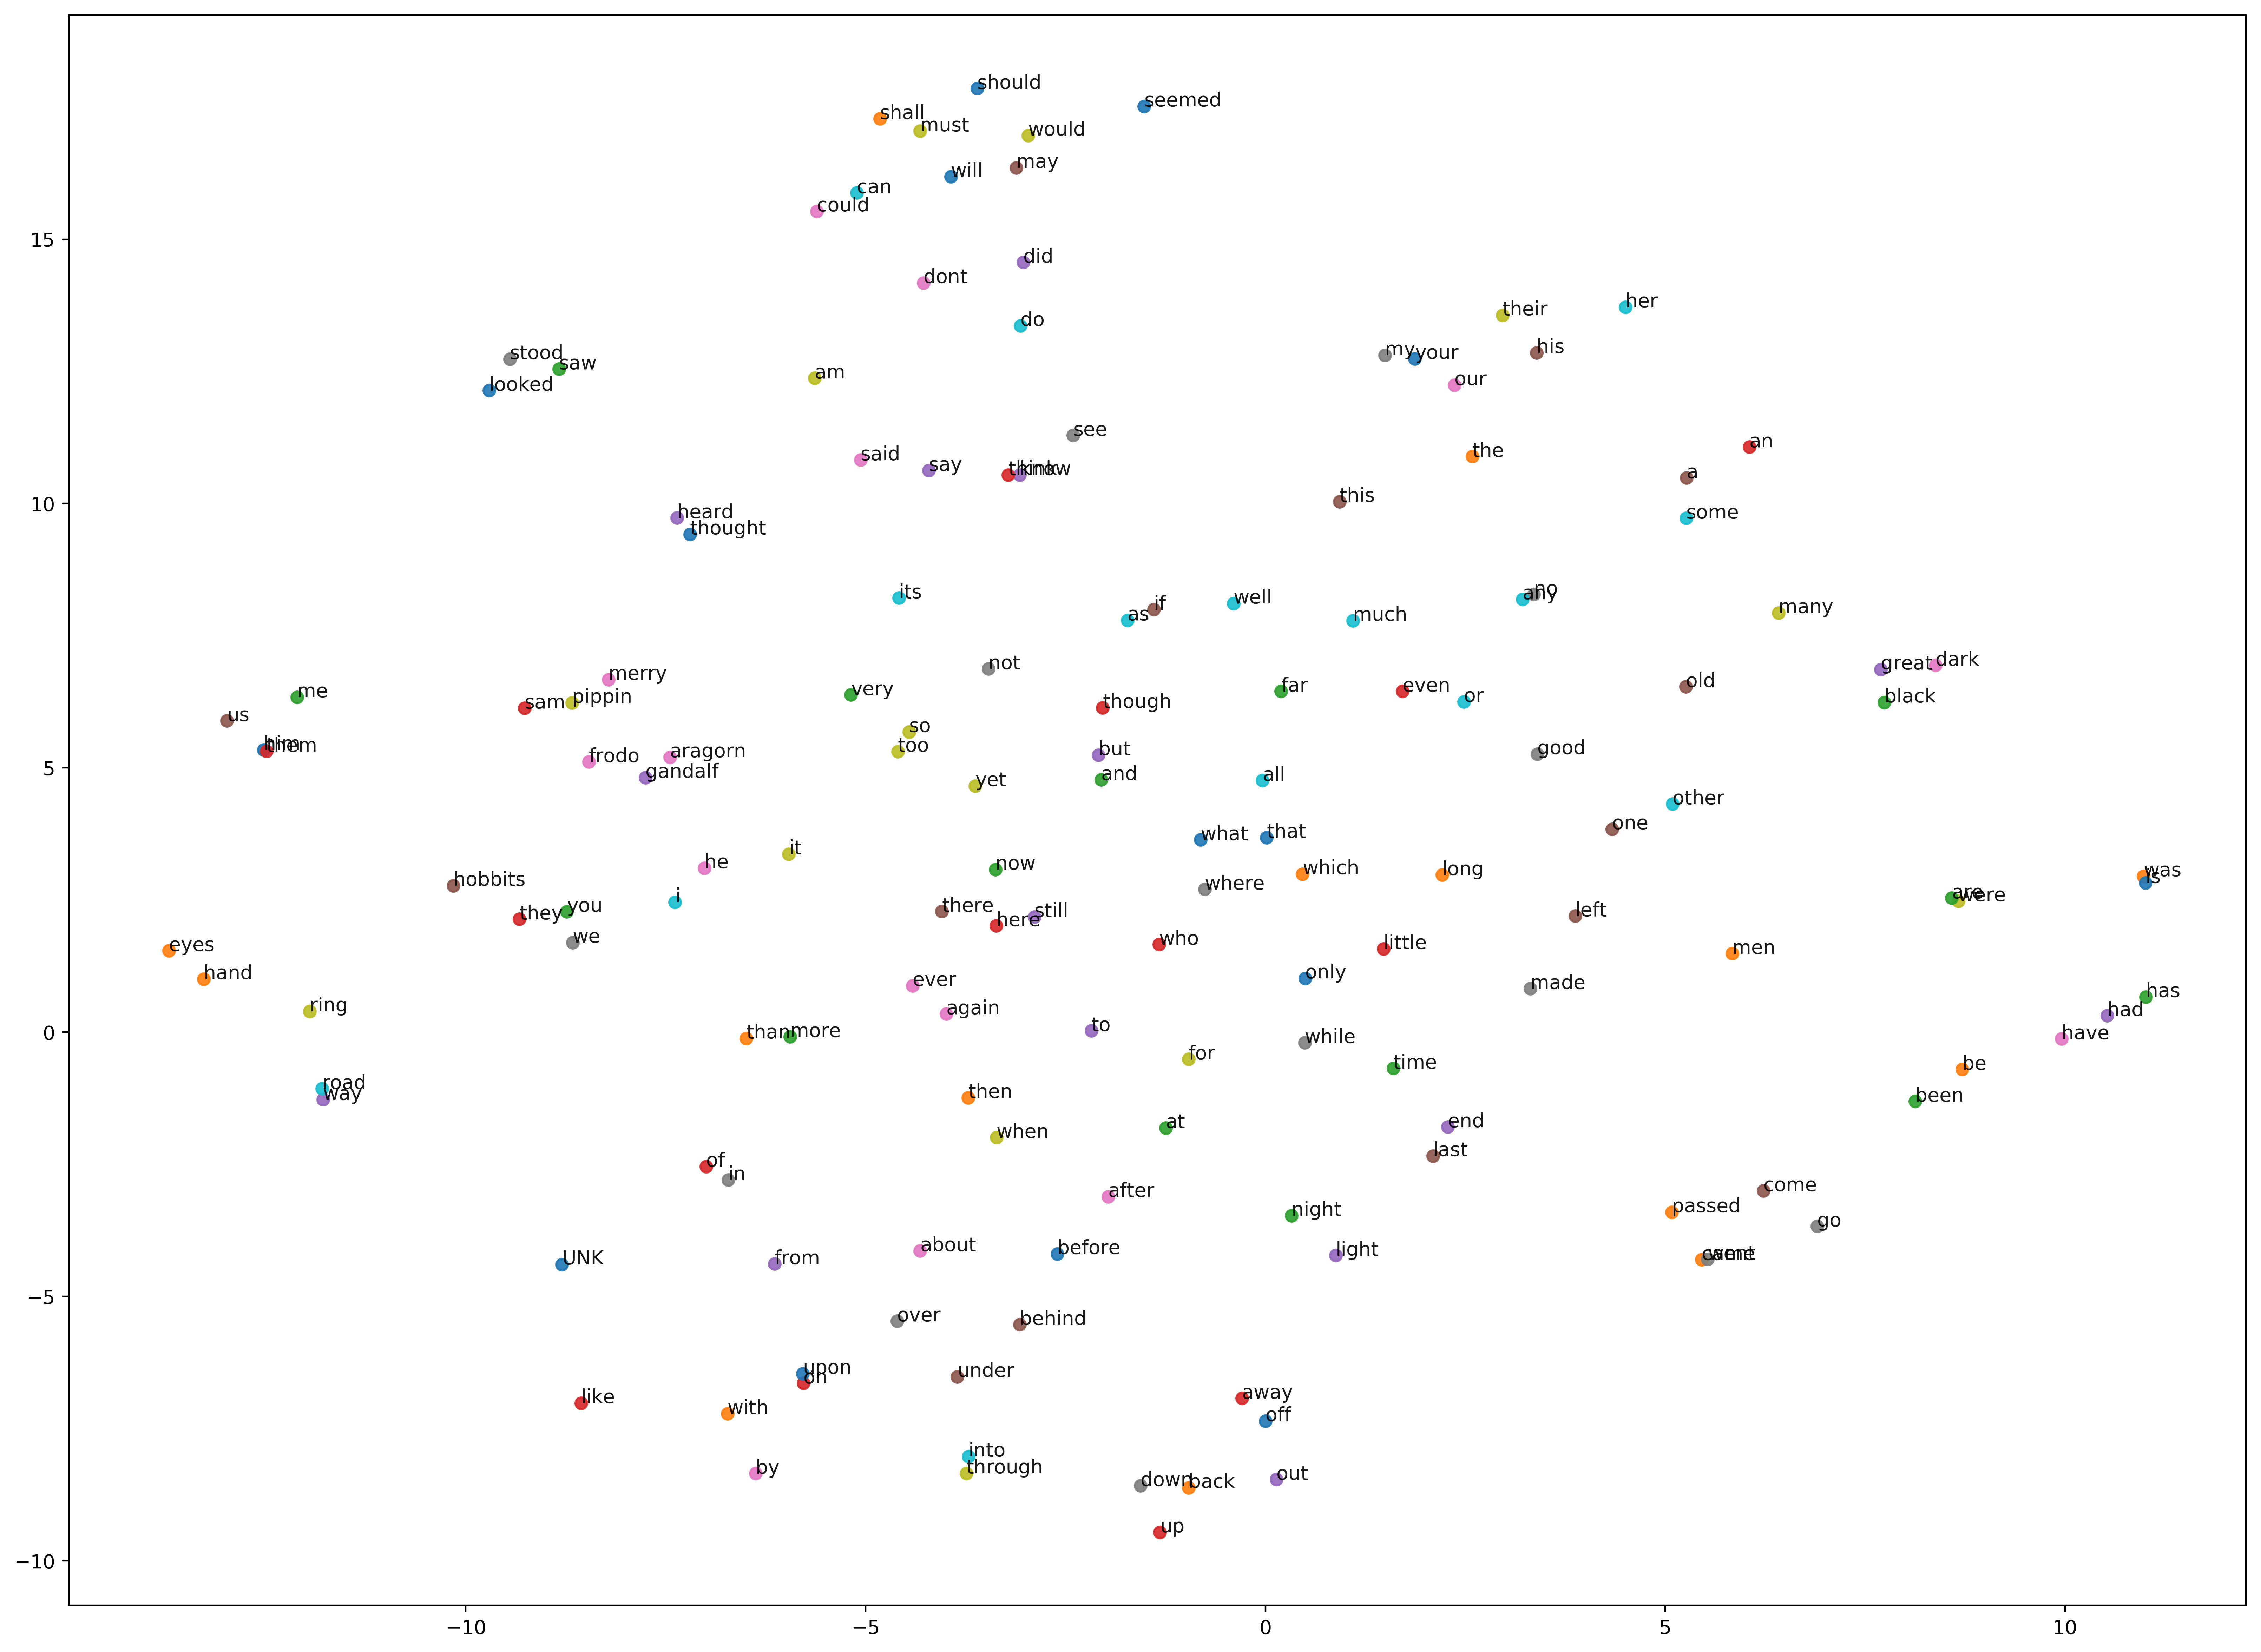

In [76]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


feat_cols = range(50)

feat_index = [dic[i] for i in range(len(dic))]

embeddings = [emb[i] for i in range(len(emb))]

testdf = pd.DataFrame(embeddings, index = feat_index, columns=feat_cols)

#df = pd.DataFrame(emb,columns=feat_cols)
#df['label'] = [dic[i] for i in range(len(dic))]
#df['label'] = df['label'].apply(lambda i: str(i))

X, y = None, None


#print(testdf.index[0:3] )
testdf.columns[0:3]


test = [dic[i] for i in range(150)]

dfc = testdf.loc[test].copy()



#tsne = TSNE(n_components=2)
#tsne_results = tsne.fit_transform(testdf)
dfc.head()


tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(dfc)
dfc['x-tsne'] = tsne_results[:,0]
dfc['y-tsne'] = tsne_results[:,1]
#print(dfc.head())

fig = plt.figure(figsize=(20,15), dpi=400)
ax = fig.add_subplot(1,1,1)

for i in range(len(dfc)):
    ax.scatter(
        x=dfc.iloc[i]["x-tsne"], 
        y=dfc.iloc[i]["y-tsne"],
        alpha=0.9,
    )
    ax.text(
        x=dfc.iloc[i]["x-tsne"],
        y=dfc.iloc[i]["y-tsne"],
        s=dfc.index[i],
        alpha=0.9,
    )
plt.show()